In [2]:
import pdb
import sys
import argparse
import itertools

import numpy as np
from scipy.stats import norm

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

sys.path.insert(0, '../../../figures')
import plot_utils as pu
import color_scheme as cs

Load data

In [3]:
state, correlations, overlaps = np.load(open('data/data_bcd.npy', 'rb'), allow_pickle=True, encoding='latin1')
sparsity1, population_rate1 = np.load(open('data/data_e1.npy', 'rb'), allow_pickle=True, encoding='latin1')
sparsity2, population_rate2 = np.load(open('data/data_e2.npy', 'rb'), allow_pickle=True, encoding='latin1')

Plot

Note: Axis label annotations in notebook figure output do not match saved output

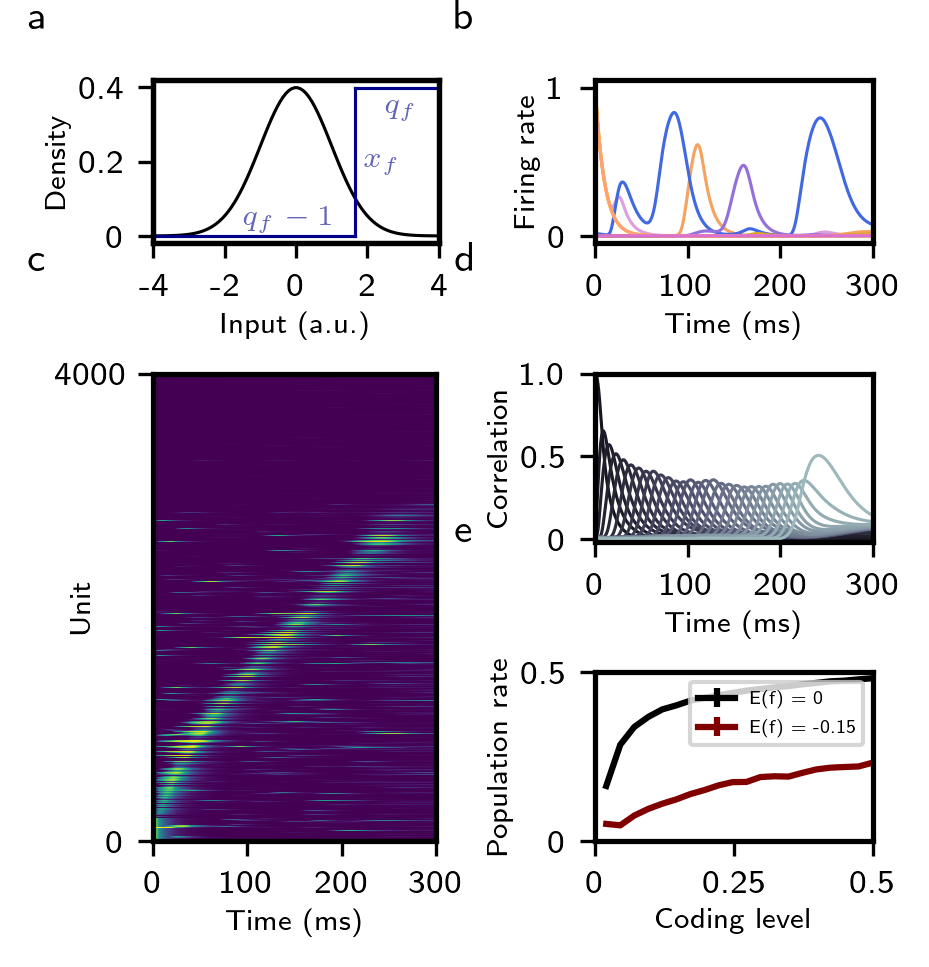

In [51]:
fig_size = pu.get_fig_size(8.7, 9.2)
fig = plt.figure(figsize=fig_size, dpi=300)

label_fontsize = 7
label_pad = 2

# Panel a, b (single rates, overlaps)
gs1a = gridspec.GridSpec(1, 2)
gs1a.update(left=0.15, top=0.95, bottom=0.80, wspace=0.7)
ax1 = plt.subplot(gs1a[:, 0])
ax1b = ax1.twinx()
gs1b = gridspec.GridSpec(1, 1)
gs1b.update(left=0.58, right=0.85, top=0.95, bottom=0.80)
ax2 = plt.subplot(gs1b[:, 0])
x_offset = -0.02
y_offset = 0.02
ax1.annotate("a", xy=(0.05+x_offset,0.95+y_offset), xycoords='figure fraction', fontsize=10)
ax2.annotate("b", xy=(0.51+x_offset,0.95+y_offset), xycoords='figure fraction', fontsize=10)

# Panel c (sorted raster)
gs2 = gridspec.GridSpec(1, 2)
gs2.update(left=0.15, top=0.68, right=0.70, bottom=0.25, wspace=0.00) 
ax3 = plt.subplot(gs2[:, 0])
ax3.annotate("c", xy=(0.05+x_offset,0.70+y_offset), xycoords='figure fraction', fontsize=10)

# Panel d, e (learning rule, x_f vs pop fr)
gs3 = gridspec.GridSpec(2, 1)
gs3.update(left=0.58, right=0.85, top=0.68, bottom=0.25, hspace=0.77, wspace=0.25) 
ax4 = plt.subplot(gs3[0, :])
ax5 = plt.subplot(gs3[1, :])
ax4.annotate("d", xy=(0.51+x_offset,0.70+y_offset), xycoords='figure fraction', fontsize=10)
ax5.annotate("e", xy=(0.51+x_offset,0.42+y_offset), xycoords='figure fraction', fontsize=10)

# Panel a
x_f = 1.645
q_f = 0.8
x_g = x_f
q_g = norm.cdf(x_f)
x = np.linspace(-4, 4, 100)
ax1.plot(x, norm.pdf(x), 'k-', lw=0.75)
ax1.set_yticks([0,0.2,0.4])
ax1.set_yticklabels([0,0.2,0.4])
ax1.set_xticks([-4,-2,0,2,4])
ax1.set_xticklabels([-4,-2,0,2,4])
ax1b.plot([x_f] * 2, [-(1 - q_f), q_f], color='darkblue', linewidth=0.75)
ax1b.plot([-4, x_f], [-(1 - q_f)] * 2, color='darkblue', linewidth=0.75)
ax1b.plot([x_f, 4], [q_f] * 2, color='darkblue', linewidth=0.75)
ax1.set_ylabel("Density", fontsize=label_fontsize, labelpad=label_pad)
ax1b.set_yticks([])
ax1.set_xlabel("Input (a.u.)", fontsize=label_fontsize, labelpad=label_pad)
ax1.text(2.5, 0.32, "$q_f$", alpha=0.6, color='darkblue', fontsize=label_fontsize)
ax1.text(-1.5, 0.02, "$q_f - 1$", alpha=0.6, color='darkblue', fontsize=label_fontsize)
ax1.text(1.9, 0.175, r"$x_f$", alpha=0.6, color='darkblue', fontsize=label_fontsize)
ax1.set_xlim([x.min(), x.max()])

# Panel b
unit_idxs = range(105,115)
colors = cs.single_unit_colors2()
np.random.RandomState(seed=6).shuffle(colors)
for i, color in zip(unit_idxs, colors):
    ax2.plot(state[i,:], color=color, linewidth=0.75)
ax2.set_xlabel("Time (ms)", fontsize=label_fontsize, labelpad=label_pad)
ax2.set_ylabel("Firing rate", fontsize=label_fontsize, labelpad=label_pad)
ax2.set_yticks([0,1])
ax2.set_yticklabels([0,1])
ax2.set_xticks([0,100,200,300])
ax2.set_xticklabels([0,100,200,300])
ax2.set_xlim([0,300])
ax2.set_ylabel("Firing rate", fontsize=label_fontsize, labelpad=label_pad)

# Panel c
skip_n = 10
idxs = np.argsort([np.argmax(r) for r in state])
idxs = [i for i in idxs if state[i].max() > 0.00]
ax3.pcolormesh(state[idxs][::skip_n,:], vmin=0.0, vmax=1.0, cmap='viridis', rasterized=True)
ax3.set_ylim([0, len(idxs)/skip_n])
ax3.set_xlim([0,300])
ax3.set_ylabel("Unit", labelpad=-10, fontsize=label_fontsize)
ax3.set_xlabel("Time (ms)", fontsize=label_fontsize, labelpad=label_pad)
ax3.set_yticks([0, len(idxs)/skip_n])
ax3.set_yticklabels([0, int(len(idxs)/skip_n)])
ax3.set_xticks([0,100,200,300])
ax3.set_xticklabels([0,100,200,300])

# Panel d
colors = cs.overlap_colors(len(correlations))
for overlap, c in zip(correlations, colors):
    ax4.plot(overlap, color=c, linewidth=0.75)
ax4.set_xticks([0,100,200,300])
ax4.set_xticklabels([0,100,200,300])
ax4.set_yticks([0,0.5,1.0])
ax4.set_yticklabels([0,0.5,1.0])
ax4.set_ylim([-0.02,1.00])
ax4.set_xlim([0,300])
ax4.set_ylabel("Correlation", fontsize=label_fontsize, labelpad=label_pad)
ax4.set_xlabel("Time (ms)", fontsize=label_fontsize, labelpad=label_pad)

# Panel e
n_realizations = 1
ax5.errorbar(
        1-norm.cdf(sparsity2),
        population_rate2.mean(axis=0),
        yerr=population_rate2.std(axis=0),
        color='black',
        linestyle='solid',
        label='E(f) = 0')
ax5.errorbar(
        1-norm.cdf(sparsity1),
        population_rate1.mean(axis=0),
        yerr=population_rate1.std(axis=0),
        color='maroon',
        label='E(f) = -0.15')
ax5.set_xlabel("Coding level", fontsize=label_fontsize, labelpad=label_pad)
ax5.set_ylabel("Population rate", fontsize=label_fontsize, labelpad=label_pad)
ax5.set_yticks([0,0.5])
ax5.set_yticklabels([0,0.5])
ax5.set_xticks([0,0.25,0.5])
ax5.set_xticklabels([0,0.25,0.5])
ax5.set_xlim([0.0,0.5])
ax5.set_yticks([0,0.5])
ax5.set_ylim([0,0.5])
ax5.legend(fontsize=4.5, loc='upper right')
    
plt.savefig("../output/4.pdf", dpi=300) #, bbox_inches='tight', pad_inches=0);